In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [ ]:
# TODO
df = pd.read_csv('/content/heart.csv')

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [ ]:
# TODO
df.info() # 1025 entries , 14 columns( 13 features and target) , null count is 0 , dtype is int64 (some are classes for quality types) except for oldpeak which is float64
df.corr()


In [ ]:
df.describe()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [ ]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [ ]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [9]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''

    #replace 0 with -1
    Y = Y.copy()
    for i in range(len(Y)):
      if(Y[i] == 0):
        Y[i] = -1

    w = np.zeros(X.shape[1])
    learning_rate = 0.01
    num_of_epochs = 100
    for n in range(num_of_epochs):
      for i in range(len(X)):
        x_i = X[i] #df.iloc[i,0:13].values
        y_i = Y[i] #df.iloc[i,13].values
        if(y_i * np.dot(x_i,w) <= 0):
          w = w + learning_rate * y_i * x_i


    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [ ]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here

    #replace 0 with -1
    Y = Y.copy()
    for i in range(len(Y)):
      if(Y[i] == 0):
        Y[i] = -1

    w = np.zeros(X.shape[1])
    learning_rate = 0.01
    num_of_epochs = 100
    errors = []
    for n in range(num_of_epochs):
      total_loss = 0
      for i in range(len(X)):

        x_i = X[i] #df.iloc[i,0:13].values
        y_i = Y[i] #df.iloc[i,13].values
        prediction = np.dot(x_i,w)
        if(y_i * prediction <= 0):
          w = w + learning_rate * y_i * x_i
          total_loss += -y_i * prediction
      errors.append(total_loss)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Training Progress')
    plt.show()

    return w

In [ ]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [ ]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.ones((X.shape[0],1)) * -1


# Concatenate the original X with the bias column
X = np.hstack((bias_column , X))


In [ ]:
# TODO: Split the data to train and test with a 0.2 ratio
indices = np.arange(len(X))
np.random.shuffle(indices)
split_point = int (0.2 * len(X))
X_train, X_val, y_train, y_val = X[indices[split_point:]], X[indices[:split_point]] , y[indices[split_point:]], y[indices[:split_point]]

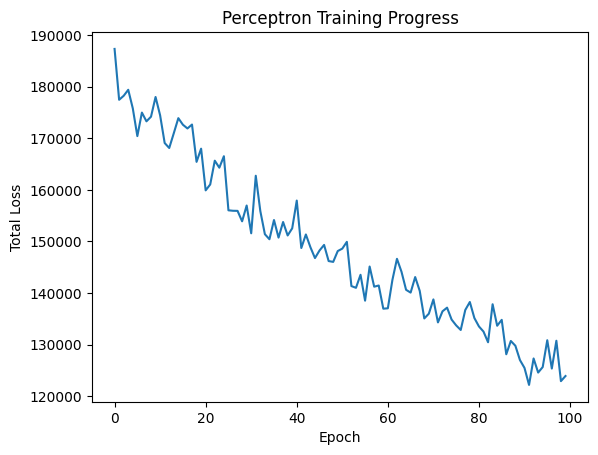

In [ ]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [12]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    return np.sum(y_true == y_pred)/len(y_true)

Get the accuracy of your model using the function you implemented.

In [ ]:
# TODO
def perceptron_predict(w, X_val):
  predictions = np.dot(X_val, w) > 0
  #predictions = np.where(predictions, 1, -1)
  return predictions.astype(int)

w = perceptron_sgd(X_train,y_train)
predictions = perceptron_predict(w, X_val)
print(accuracy_score(y_val, predictions))

0.8097560975609757


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [19]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # TODO: Populate the confusion matrix

    for a, p in zip(actual, predicted):
        matrix[labels.index(a), labels.index(p)] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [20]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix

    # Create the heatmap plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    # Add labels and title
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')

    # Show plot
    plt.show()

Now plot the confusion matrix for your model:

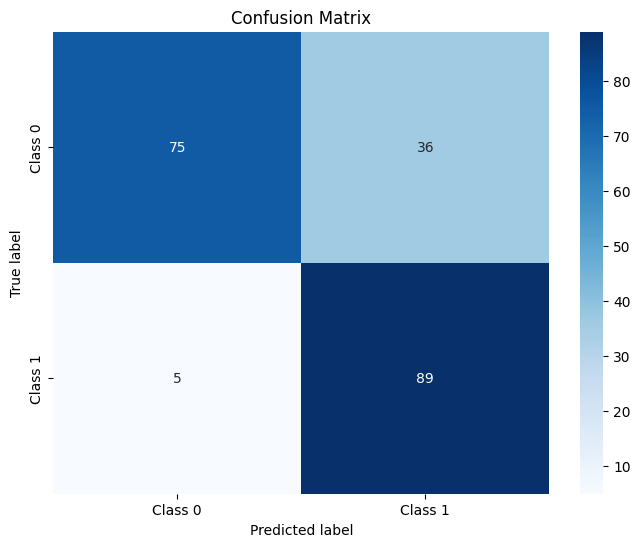

In [ ]:
# TODO

cm = confusion_matrix(y_val, predictions, labels=[0, 1])
plot_confusion_matrix(cm, labels=["Class 0", "Class 1"])


### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [14]:
def recall_score(cm):
  #TODO: return the recall score
  TP = cm[1, 1]
  FN = cm[1, 0]
  recall = TP / (TP + FN)
  return recall
print(recall_score(cm))

In [15]:
def precision_score(cm):
  #TODO: return the precision score
  TP = cm[1, 1]
  FP = cm[0, 1]
  precision = TP / (TP + FP)
  return precision
print(precision_score(cm))

In [16]:
def f1_score(cm):
  #TODO: return the f1 score
  recall = recall_score(cm)
  precision = precision_score(cm)
  f1 = 2 * (precision * recall) / (precision + recall)
  return f1
print(f1_score(cm))

# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [ ]:
class MixedDataNB:

    def __init__(self):
        # Your Implementation here
        self.priors = None  # P(class_c)
        self.mean = None
        self.var = None
        self.discrete_feature_likelihood_estimates = None  # P(feature_i | class_c)
        self.discrete_features = None
        self.continuous_features = None
        self.y_classes = None
        self.discrete_features_occurrences = None  # for each class in y how many times each feature appears

    def fit(self, X: np.ndarray, y, discrete_features, continuous_features):
        self.y_classes, y_classes_counts = np.unique(y, return_counts=True)
        self.priors = y_classes_counts / np.sum(y_classes_counts)

        self.discrete_features = discrete_features
        self.continuous_features = continuous_features
        #  discrete data:
        self.discrete_features_occurrences = np.zeros((len(self.y_classes), len(discrete_features)))
        for i, y_class in enumerate(self.y_classes):
            for j, feature in enumerate(discrete_features):
                s = np.sum(X[np.where(y == y_class)[0]][:,feature])
                self.discrete_features_occurrences[i][j] = s

        self.discrete_feature_likelihood_estimates = np.zeros(self.discrete_features_occurrences.shape)
        for i, y_class in enumerate(self.y_classes):
            for j, feature in enumerate(self.discrete_features):
                # here we estimated not considering there are any continues variables
                self.discrete_feature_likelihood_estimates[i, j] = (self.discrete_features_occurrences[i, j] + 1) / (
                        np.sum(self.discrete_features_occurrences[i]) + len(discrete_features))

        #  continuous data
        self.mean = np.zeros((len(self.y_classes), len(continuous_features)))
        self.var = np.zeros((len(self.y_classes), len(continuous_features)))

        for i, y_class in enumerate(self.y_classes):
            X_c = X[np.where(y == y_class)[0]][:,self.continuous_features]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0)

    def _row_discrete_likelihood(self, x, y_class):  # likelihood for a row of data
        feature_likelihoods = []
        y_index = np.where(self.y_classes == y_class)[0][0]
        for i, feature in enumerate(self.discrete_features):
            feature_likelihoods.append(self.discrete_feature_likelihood_estimates[y_index][i] ** x[feature])
        return np.prod(feature_likelihoods)

    def _row_continuous_likelihood(self, x, y_class):
        y_index = np.where(self.y_classes == y_class)[0][0]
        feature_likelihoods = self._guassian_pdf(x[self.continuous_features], y_index)
        return np.prod(feature_likelihoods)

    def _guassian_pdf(self, x, y_index):
        mean = self.mean[y_index]
        var = self.var[y_index]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        return np.array([self.predict_row(x) for x in X])

    def predict_row(self, x):
        max_posterior = 0
        max_class = None

        for i, y_class in enumerate(self.y_classes):
            ans = self._row_continuous_likelihood(x, y_class) * self._row_discrete_likelihood(x, y_class) * self.priors[i]
            if ans > max_posterior:
                max_posterior = ans
                max_class = y_class

        return max_class

    def _predict_discrete(self, x):
        probs = []
        for i, y_class in enumerate(self.y_classes):
            likelihood = self._row_discrete_likelihood(x, y_class)
            prior = self.priors[i]
            probs.append(prior * likelihood)
        return np.max(probs)



## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [ ]:
# TODO
# cant use the same X variable as perceptron because there is a -1 bias in that.
# but will still use same train val split and data will be the same.
features_except_target = feature_list.copy()
features_except_target.remove('target')

X = df[features_except_target].to_numpy()
y = df.loc[:, "target"].to_numpy()

# using the same indices and split point from perceptron part
# althoigh different data sets give different accuracies which might be better in practice

#indices = np.arange(len(X))
#np.random.shuffle(indices)
#split_point = int (0.2 * len(X))
X_train, X_val, y_train, y_val = X[indices[split_point:]], X[indices[:split_point]] , y[indices[split_point:]], y[indices[:split_point]]

### Model training

In [ ]:
# TODO

discrete_feature_indices = []
continuous_feature_indices = []

for i, feature in enumerate(features_except_target) :
  if len(df[feature].unique())<25 :
    discrete_feature_indices.append(i)
  else:
    continuous_feature_indices.append(i)

mdnb = MixedDataNB()
mdnb.fit(X_train, y_train, np.array(discrete_feature_indices), np.array(continuous_feature_indices))


### Make predictions

In [ ]:
# TODO
predictions = mdnb.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [ ]:
print(accuracy_score(y_val, predictions))

0.8634146341463415


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

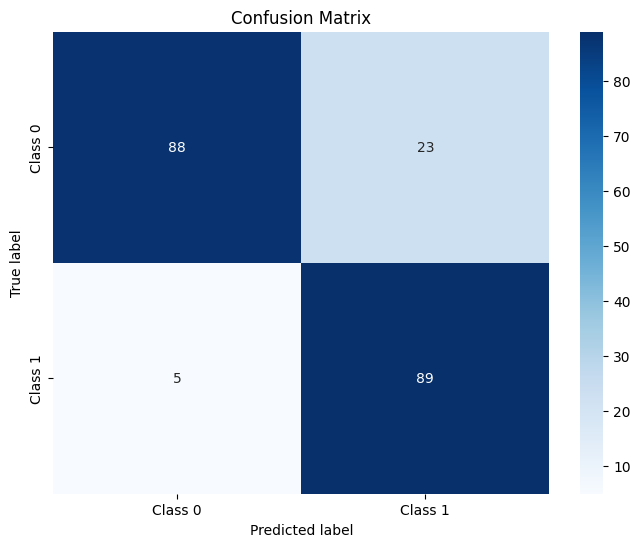

In [ ]:
# TODO


cm = confusion_matrix(y_val, predictions, labels=[0, 1])
plot_confusion_matrix(cm, labels=["Class 0", "Class 1"])


### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [ ]:
print(recall_score(cm))

0.9468085106382979


In [ ]:
print(precision_score(cm))

0.7946428571428571


In [ ]:
print(f1_score(cm))

0.8640776699029127


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


In [ ]:
# TODO
chol_index = 4
oldpeak_index = 9
X_train_without_chol = np.delete(X_train, chol_index, axis=1)
X_val_without_chol = np.delete(X_val, chol_index, axis=1)

X_train_without_oldpeak = np.delete(X_train, oldpeak_index, axis=1)
X_val_without_oldpeak = np.delete(X_val, oldpeak_index, axis=1)


Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [ ]:
# TODO
discrete_feature_indices = []
continuous_feature_indices = []

features_without_target_and_chol = features_except_target.copy()
features_without_target_and_chol.remove('chol')

for i, feature in enumerate(features_without_target_and_chol) :
  if len(df[feature].unique())<25 :
    discrete_feature_indices.append(i)
  else:
    continuous_feature_indices.append(i)

noCholModel = MixedDataNB()
noCholModel.fit(X_train_without_chol, y_train, np.array(discrete_feature_indices), np.array(continuous_feature_indices))

noChol_predictions = noCholModel.predict(X_val_without_chol)

Remove oldpeak and test model

In [ ]:
# TODO
discrete_feature_indices = []
continuous_feature_indices = []

features_without_target_and_oldpeak = features_except_target.copy()
features_without_target_and_oldpeak.remove('chol')

for i, feature in enumerate(features_without_target_and_oldpeak) :
  if len(df[feature].unique())<25 :
    discrete_feature_indices.append(i)
  else:
    continuous_feature_indices.append(i)

noOldpeakModel = MixedDataNB()
noOldpeakModel.fit(X_train_without_oldpeak, y_train, np.array(discrete_feature_indices), np.array(continuous_feature_indices))

noOldpeak_predictions = noOldpeakModel.predict(X_val_without_oldpeak)

Comparison

with both features accuracy: 0.8634146341463415
without chol accuracy: 0.8731707317073171
without oldPeak accuracy: 0.7463414634146341



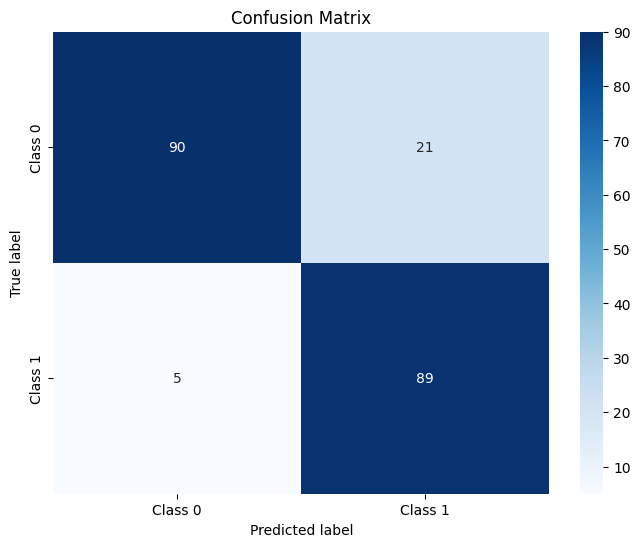

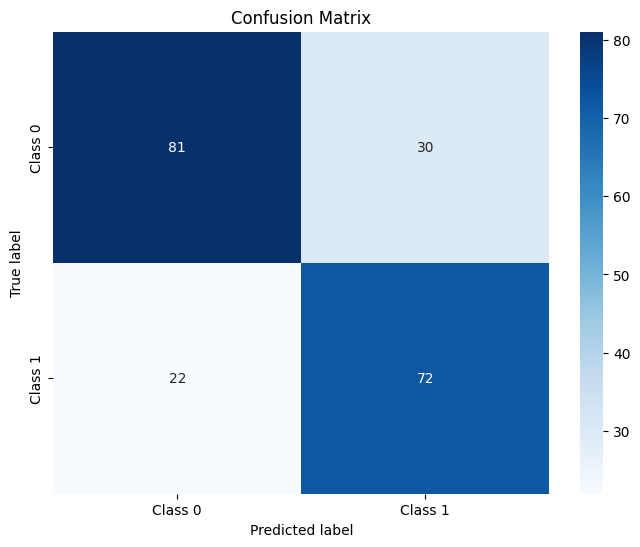

F1 score without cholestrol:0.8725490196078431
F1 score without oldpeak:0.7346938775510204


In [ ]:
print(f'''with both features accuracy: {accuracy_score(y_val, predictions)}
without chol accuracy: {accuracy_score(y_val, noChol_predictions)}
without oldPeak accuracy: {accuracy_score(y_val, noOldpeak_predictions)}
''')

no_chol_cm = confusion_matrix(y_val, noChol_predictions, labels=[0, 1])
plot_confusion_matrix(no_chol_cm, labels=["Class 0", "Class 1"])

no_oldpeak_cm = confusion_matrix(y_val, noOldpeak_predictions, labels=[0, 1])
plot_confusion_matrix(no_oldpeak_cm, labels=["Class 0", "Class 1"])

print(f"F1 score without cholestrol:{f1_score(no_chol_cm)}")
print(f"F1 score without oldpeak:{f1_score(no_oldpeak_cm)}")

**Answer:**
we see that without any of them the accuracy has reduced significantly so the are both relevant to out prediction.
but their difference is not much.
after this maybe we should check feature correlations as well to better determine their imprtance.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:
on the certain train tests split that i did they both performed well. accuracy score was 0.8 for perceptron and 0.86 for naive bayes. but naive bayes perfomed a little bit better. in terms of f1 score perceptron was about 0.81 and naive bayes was about 0.86.


# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [ ]:
df = pd.read_csv("1.csv")

### Find the distribution


Find the number of samples from each target label.

In [ ]:
# TODO
feature_list = [feature for feature in df.columns]
feature_list_without_target = feature_list.copy()
feature_list_without_target.remove('target')
X = df[feature_list_without_target].to_numpy()
y = df.loc[:, "target"].to_numpy()

labels, label_counts = np.unique(y, return_counts=True)
print(f'label {labels[0]} counts: {label_counts[0]}\nlabel {labels[1]} counts: {label_counts[1]}')


label 0 counts: 499
label 1 counts: 226


### Split data

In [8]:

def my_train_test_split(X, y, ratio = 0.2):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_point = int (0.2 * len(X))
    return X[indices[split_point:]], X[indices[:split_point]] , y[indices[split_point:]], y[indices[:split_point]]

In [ ]:
# TODO
X_train, X_val, y_train, y_val = my_train_test_split(X , y)

### Train model and make predictions

In [7]:
def perceptron_predict(w, X_val):
  predictions = np.dot(X_val, w) > 0
  #predictions = np.where(predictions, 1, -1)
  return predictions.astype(int)

In [ ]:
# TODO

w = perceptron_sgd(X_train,y_train)
perceptron_predictions = perceptron_predict(w, X_val)
print(accuracy_score(y_val, perceptron_predictions))

0.7931034482758621


### Plot confusion matrix

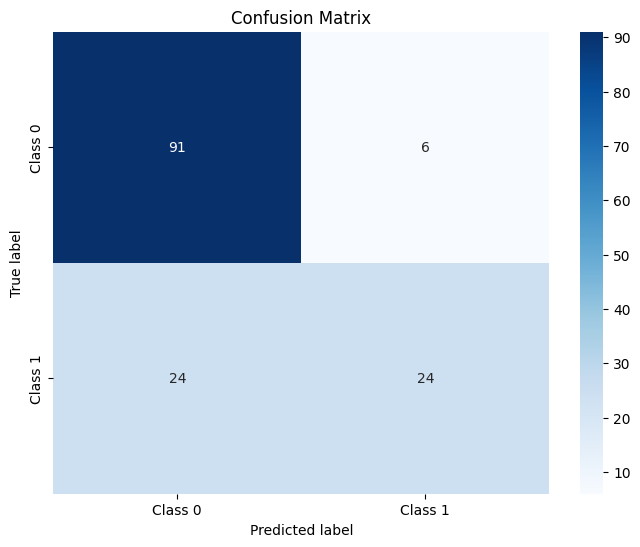

In [ ]:
# TODO
d1cm = confusion_matrix(y_val, perceptron_predictions, [0, 1])
plot_confusion_matrix(d1cm, ["Class 0","Class 1"])


### Calculate metrics

In [ ]:
# TODO
print(f"recall score: {recall_score(d1cm)}")
print(f"precision score: {precision_score(d1cm)}")
print(f"f1 score: {f1_score(d1cm)}")

recall score: 0.5
precision score: 0.8
f1 score: 0.6153846153846154


## Second dataset

### Load data

In [ ]:
df = pd.read_csv("2.csv")

### Find the distribution


Find the number of samples from each target label.

In [ ]:
# TODO
feature_list = [feature for feature in df.columns]
feature_list_without_target = feature_list.copy()
feature_list_without_target.remove('target')
X = df[feature_list_without_target].to_numpy()
y = df.loc[:, "target"].to_numpy()

labels, label_counts = np.unique(y, return_counts=True)
print(f'label {labels[0]} counts: {label_counts[0]}\nlabel {labels[1]} counts: {label_counts[1]}')

label 0 counts: 499
label 1 counts: 126


### Split data

In [ ]:
# TODO
X_train, X_val, y_train, y_val = my_train_test_split(X , y)

### Train model and make predictions

In [ ]:
# TODO
w = perceptron_sgd(X_train,y_train)
perceptron_predictions_2 = perceptron_predict(w, X_val)
print(accuracy_score(y_val, perceptron_predictions_2))

0.9333333333333333


### Plot confusion matrix

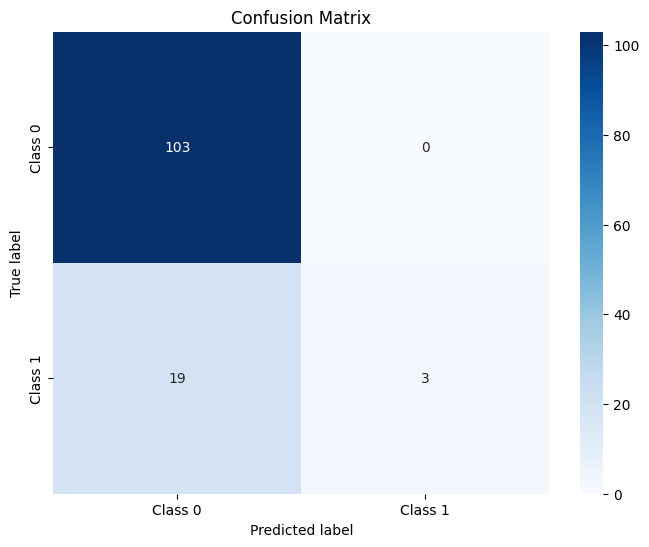

In [ ]:
# TODO
d2cm = confusion_matrix(y_val, perceptron_predictions_2, [0, 1])
plot_confusion_matrix(d2cm, ["Class 0","Class 1"])

### Calculate metrics

In [ ]:
# TODO
print(f"recall score: {recall_score(d2cm)}")
print(f"precision score: {precision_score(d2cm)}")
print(f"f1 score: {f1_score(d2cm)}")

recall score: 0.13636363636363635
precision score: 1.0
f1 score: 0.24000000000000002


## Third dataset

### Load data

In [4]:
df = pd.read_csv("3.csv")

### Find the distribution


Find the number of samples from each target label.

In [5]:
# TODO
feature_list = [feature for feature in df.columns]
feature_list_without_target = feature_list.copy()
feature_list_without_target.remove('target')
X = df[feature_list_without_target].to_numpy()
y = df.loc[:, "target"].to_numpy()

labels, label_counts = np.unique(y, return_counts=True)
print(f'label {labels[0]} counts: {label_counts[0]}\nlabel {labels[1]} counts: {label_counts[1]}')

label 0 counts: 499
label 1 counts: 26


### Split data

In [10]:
# TODO
X_train, X_val, y_train, y_val = my_train_test_split(X , y)

### Train model and make predictions

In [17]:
# TODO
w = perceptron_sgd(X_train,y_train)
perceptron_predictions_3 = perceptron_predict(w, X_val)
print(accuracy_score(y_val, perceptron_predictions_3))

0.7714285714285715


### Plot confusion matrix

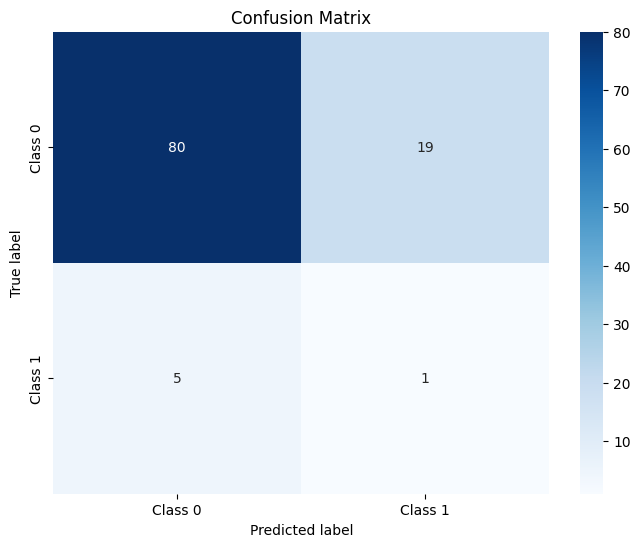

In [21]:
# TODO
d3cm = confusion_matrix(y_val, perceptron_predictions_3, [0, 1])
plot_confusion_matrix(d3cm, ["Class 0","Class 1"])

### Calculate metrics

In [22]:
# TODO
print(f"recall score: {recall_score(d3cm)}")
print(f"precision score: {precision_score(d3cm)}")
print(f"f1 score: {f1_score(d3cm)}")

recall score: 0.16666666666666666
precision score: 0.05
f1 score: 0.07692307692307691


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**
the f1, recall and precision scores might become undefined so they are not always useful and they dont consider TN they care more about TP. accuracy score only check the sum of true positive and true negative. so in case we have a lot of class 1 data and few class 0 data, if we chose the constant predictor which always gives 1 will have high accuracy. because of this the best way is to consider the confision matrix as a whole and consider the ratio of TN to TN+FP